<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201/SQ/Assignment_big_data_SQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  **Online Payment Fraud Detection ✨**

<p align="center">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCK3jeaFz_5CmsrKm50smjQCIYzoXZbgWZ0Q&usqp=CAU"/>
</p>


Group Members

*   NUR SYAMALIA FAIQAH BINTI MOHD KAMAL (A20EC0118)
*   QAISARA BINTI ROHZAN (A20EC0133)

Online payment is the most prevalent transaction technique in the world today. However, with an increase in online purchases comes an increase in payment fraud. The goal of this study is to identify fraudulent and non-fraudulent payments. The dataset was obtained from Kaggle and contains historical information about fraudulent transactions that can be used to detect fraud in online payments. This dataset was found on Kaggle and has the size of **493.53 MB**.

The dataset consists of **212087 records and 11 columns**:

<br>

|    VARIABLES   |   ABOUT   |
|----------------|-------------------------------|
| **step** |represents a unit of time where 1 step equals 1 hour  |
| **type** |type of online transaction   |
| **amount** |the amount of the transaction   |
| **nameOrig** |customer starting the transaction | 
| **oldbalanceOrg** |balance before the transaction |
| **newbalanceOrig** |balance after the transaction   |
| **nameDest** |recipient of the transaction |
| **oldbalanceDest** |initial balance of recipient before the transaction |
| **newbalanceDest** |the new balance of recipient after the transaction   |
| **isFraud** |fraud transaction   |
| **isFlaggedFraud** | fraud alert |

</br>

Tools: 🔎
- Google Colab

> Sources: [Kaggle: Online Payments Fraud Detection](https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset)

## **Downloading the Dataset**

Let's begin by downloading the data by mounting Google Drive into Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/Colab Notebooks/PS_20174392719_1491204439457_log.csv'

**Importing libraries**

There are many libraries built into Python, as well as many additional libraries that can be installed for use in a program. Below are the libraries used for Exploratory Data Analysis (EDA such) in which **numpy** is used for mathematical computation on large arrays and matrices of numerical data whereas **pandas** is used for data manipulation and analysis. 

In [ ]:
#Importing libraries 
import pandas as pd
import numpy as np

In [ ]:
#Loading data from a cvs file
data = pd.read_csv(dataset)

#Print head / first 5 rows of dataset
data.head() 

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In this dataset there are 11 columns.

The dataset has been downloaded and extracted.

## **Data Preparation and Cleaning**

- Data cleaning and preparation is the process of correcting or eradicating inaccurate, corrupted, improperly formatted, duplicate, or insufficient data from a dataset. There are numerous potential for data duplication or labelling errors when merging various data sources.



#### **Sampling**
We utilise sampling because it can be especially beneficial with data sets that are too vast to study in full, such as in big data analytics applications or surveys. By sampling, we can reduce the memory usage.

In [ ]:
# sampling
import random


filename = dataset 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//30  # sample size of 30%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pd.read_csv(filename, skiprows=skip)
df

step      type       amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT      4024.36  C1265012928        2671.00   
1          1   PAYMENT      3099.97   C249177573       20771.00   
2          1   PAYMENT     11633.76  C1716932897       10127.00   
3          1   PAYMENT      8586.98  C1305004711        3763.00   
4          1   PAYMENT      1063.53  C1406206626       83084.00   
...      ...       ...          ...          ...            ...   
212082   726  TRANSFER    185529.91  C1426277806      185529.91   
212083   734  TRANSFER   2079746.13   C303008218     2079746.13   
212084   736  CASH_OUT   3912252.81  C2015532834     3912252.81   
212085   741  TRANSFER  10000000.00   C780743034    45674547.89   
212086   741  CASH_OUT  10000000.00  C1668034607    10000000.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0                 0.00  M1176932104            0.00            0.00        0   
1             17671.03  M2096539129            0.00            0.00        0   
2                 0.00   M801569151            0.00            0.00        0   
3                 0.00   M494077446            0.00            0.00        0   
4             82020.47  M1816522350            0.00            0.00        0   
...                ...          ...             ...             ...      ...   
212082            0.00   C753666064            0.00            0.00        1   
212083            0.00  C1140317769            0.00            0.00        1   
212084            0.00  C1094245797            0.00      3912252.81        1   
212085     35674547.89   C491519946            0.00            0.00        1   
212086            0.00  C1250722530       192912.98     10192912.98        1   

        isFlaggedFraud  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
212082               0  
212083               0  
212084               0  
212085               0  
212086               0  

[212087 rows x 11 columns]

Explore the number of rows & columns, ranges of values etc. using **.info()**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212087 entries, 0 to 212086
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            212087 non-null  int64  
 1   type            212087 non-null  object 
 2   amount          212087 non-null  float64
 3   nameOrig        212087 non-null  object 
 4   oldbalanceOrg   212087 non-null  float64
 5   newbalanceOrig  212087 non-null  float64
 6   nameDest        212087 non-null  object 
 7   oldbalanceDest  212087 non-null  float64
 8   newbalanceDest  212087 non-null  float64
 9   isFraud         212087 non-null  int64  
 10  isFlaggedFraud  212087 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 17.8+ MB


After sampling, we can see that the memory usage is **decreased to 17.8+ MB**.

Use DataFrame.shape to retrieve the shape of a Pandas DataFrame. The shape property produces a tuple that represents the DataFrame's dimensionality.

In [ ]:
df.shape

(212087, 11)

#### **Check missing values**

Handle missing, incorrect and invalid data. Each column is traversed to identify if any missing value fills a record.

In [ ]:
# identify missing value
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### **Check duplicate rows**

If there is no missing data, then check for the presence of duplicates.

In [ ]:
df.duplicated().sum()

0

No duplicated rows found

## **Exploratory Analysis and Visualization 📊**



The files used for visualisation in Python are listed below.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go

#### **Finding interesting statistics for numeric columns**

The **describe()** method is used for calculating some statistical data like percentile, mean, minimum, maximum, and standard deviation of the numerical values of the Series or DataFrame.

In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  212087.000000  2.120870e+05   2.120870e+05    2.120870e+05   
mean      243.914908  1.803464e+05   8.291348e+05    8.497781e+05   
std       142.627910  6.189214e+05   2.881964e+06    2.916251e+06   
min         1.000000  8.100000e-01   0.000000e+00    0.000000e+00   
25%       156.000000  1.330624e+04   0.000000e+00    0.000000e+00   
50%       240.000000  7.442152e+04   1.408700e+04    0.000000e+00   
75%       335.000000  2.087845e+05   1.072098e+05    1.418976e+05   
max       741.000000  6.096528e+07   5.039905e+07    4.039905e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    2.120870e+05    2.120870e+05  212087.000000        212087.0  
mean     1.100423e+06    1.226729e+06       0.001249             0.0  
std      3.534759e+06    3.810088e+06       0.035326             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00    0.000000e+00       0.000000             0.0  
50%      1.306532e+05    2.109327e+05       0.000000             0.0  
75%      9.373382e+05    1.108169e+06       0.000000             0.0  
max      3.281945e+08    3.555534e+08       1.000000             0.0

#### **Finding Mean**

Here we can calculate the average transaction amount by transaction type.

In [ ]:
avg_amount_type = df.groupby('type').apply(lambda x: x['amount'].mean()).reset_index(name= "Average Transaction Amount")
pd.set_option('display.precision',2)
avg_amount_type

type  Average Transaction Amount
0   CASH_IN                   168876.79
1  CASH_OUT                   176574.30
2     DEBIT                     5241.26
3   PAYMENT                    13127.42
4  TRANSFER                   924503.52

####**Pie Chart**
> A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. 

In [ ]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(df, values=quantity, names=transactions, title="Transaction Type")
figure.show()

The pie chart clearly shows the distribution of transaction types because it is already given in whole percentages. The majority of transactions are made using cash out, followed by payment, cash in, transfer, and debit.

#### **Corellation Heatmap**

> Correlation is a term that refers to the strength of a relationship between two variables where a strong, or high, correlation means that two or more variables have a strong relationship with each other while a weak or low correlation means that the variables are hardly related.

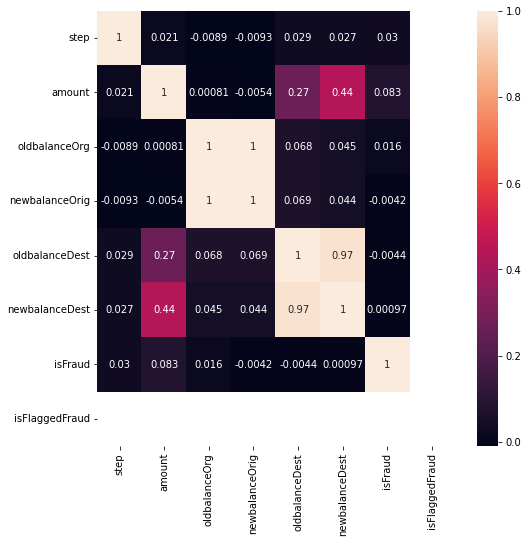

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)

### **KDE Rate chart**

>A kernel density estimate (KDE) plot, similar to a histogram, is a method for showing the distribution of observations in a dataset. KDE depicts data in one or more dimensions using a continuous probability density curve.

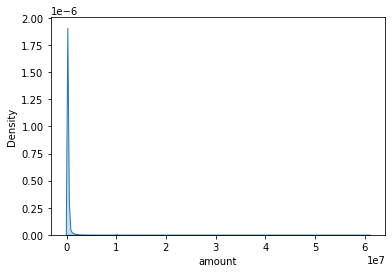

In [ ]:
sns.kdeplot(df['amount'], shade=True)

- The distribution of transaction amounts is right skewed.
- This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.
- (mode < median < mean)

### **Scatter Plot**
> Scatter plots are used to show how much one variable affects another by plotting data points on a horizontal and vertical axis.


In [ ]:
fig = px.scatter(df, x="step", y="amount", facet_col="isFraud", title="Fraud Transaction by Step and Amount")
fig.show()

We can see that step 302 in nonfraudulent trasaction involve the highest amount which is 66761272.21.

## **Question & Answers (Q&A)**

#### Question 1: What is the highest transaction type?

In [ ]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(df, values=quantity, names=transactions, title="Transaction Type")
figure.show()

> Answer 1: Cash out is the highest transaction type which is the 35% from the whole percentage.

#### Question 2: What is the maximum fraudulent and nonfraudulent amount of transaction?


In [ ]:
fig = px.box(df, x=df.isFraud, y=df.amount, title="Fraudulent and Nonfraudulent by Amount of Transaction")
fig.show()

print()
isFraud_amount = df.groupby('isFraud').agg({'amount': ['min', 'max']})
print(isFraud_amount)


          amount          
             min       max
isFraud                   
0           0.81  6.10e+07
1        1074.81  1.00e+07


> Answer 2:

| | Nonfraudulent | Fraudulent |
|-|----------------|-------|
|maximum| 66761272.21 | 10000000.00 |
|minimum| 0.33 |0.00 |







#### Question 3:  If the transaction is fraudulent, does the balance after the transaction (newbalanceOrg) affect the new balance of recipient after the transaction (newbalanceDest)?



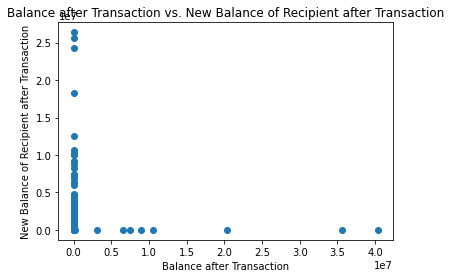

<Figure size 1440x1440 with 0 Axes>

In [ ]:
afterTransactionOld = df['newbalanceOrig'].where(df['isFraud']==1)
afterTransactionDest = df['newbalanceDest'].where(df['isFraud']==1)

# Create the scatter plot
plt.scatter(afterTransactionOld, afterTransactionDest)

# Add labels and title
plt.xlabel('Balance after Transaction')
plt.ylabel('New Balance of Recipient after Transaction')
plt.title('Balance after Transaction vs. New Balance of Recipient after Transaction')
plt.figure(figsize=(20,20))

# Show the plot
plt.show()

> Answer 3: Yes, from the scatterplot above we can see that the balance after the transaction (newbalanceOrg) does affect the new balance of recipient after the transaction (newbalanceDest) where the recipient's balance is significantly higher than what would be expected given their actual account balance. The higher the customer's balance, the new balance of the recipient's account remains constant.

#### Question 4: Who are the top 10 customers and recipients for fraudulent transaction?

In [ ]:
# Top 10 customers for fraudulent transaction
df1 = df[df['isFraud']==1]
top10Cust = df1.groupby('nameOrig')['amount'].sum().sort_values(ascending=False)[:10]

print(top10Cust)

nameOrig
C1799904347    1.00e+07
C1562962865    1.00e+07
C2062946234    1.00e+07
C339144629     1.00e+07
C1817868641    1.00e+07
C512841143     1.00e+07
C780743034     1.00e+07
C590657619     1.00e+07
C1049094143    1.00e+07
C619552920     1.00e+07
Name: amount, dtype: float64


In [ ]:
# Top 10 recipients for fraudulent transaction
top10Recip = df1.groupby('nameDest')['amount'].sum().sort_values(ascending=False)[:10]
print(top10Recip)

nameDest
C1250722530    1.00e+07
C668046170     1.00e+07
C383956352     1.00e+07
C447852930     1.00e+07
C2136471075    1.00e+07
C2129872070    1.00e+07
C1971187430    1.00e+07
C491519946     1.00e+07
C1817199105    1.00e+07
C919151595     1.00e+07
Name: amount, dtype: float64


> Answer 4: We can see the list of top 10 customers and recipients that involve in fraudulent transactions. The majority of them conduct transactions in  millions of dollars.

#### Question 5: What is the distribution of step (represents a unit of time where 1 step equals to an hour)?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



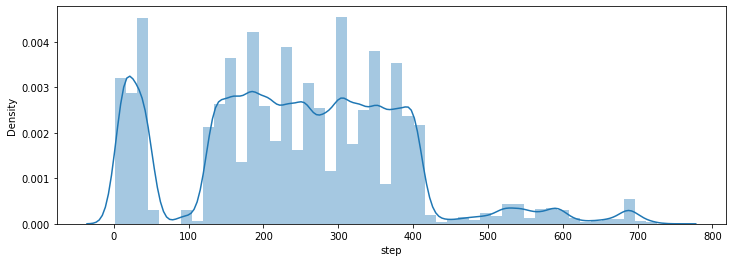

In [ ]:
plt.figure(figsize=(12, 4))
sns.distplot(df['step'], bins=50)

> Answer 5: The range of 200 to 400 step appears to contain the greatest distribution.

## **Inferences and Conclusion**

When applying EDA to an online payment fraud detection dataset, you can use various visualization and statistical methods to explore the dataset and draw conclusions about the underlying patterns and relationships in the data. For example, you might use pie charts to explore the distribution of different types of online payments or fraud labels, and use this information to identify which types of payments are most likely to be fraudulent. Similarly, you might use scatter plots to explore the relationship between the amount of a payment and the time it was made, and use this information to identify patterns in the data that might indicate fraudulent activity.

In **Question 1**, we could see that CASH_OUT is the most favourable form of transaction used by customers followed by PAYMENT, CASH_IN, TRANSFER AND DEBIT whereas in **Question 2** we can see that the maximum amount  for non-fraudulent transaction is equivalent to 67 million and for fraudulent transactions is accumulated to 10 million. 

In **Question 3**, we can see the scatter plot clearly shows that there is a correlation between a customer's account balance and the recipient's new balance after a transaction. This information can be useful in detecting online payment fraud, as it can help identify suspicious transactions where the recipient's new balance is significantly higher than would be expected based on the customer's account balance. Additionally, it can also be used to help identify potentially fraudulent transactions where a customer's account balance is very low, yet the recipient's balance increases significantly.

In **Question 4**, we can prove Question 2 by listing the top 10 customer and recipients that are involved in fraudulent transactions. All those who are involved have given and received an amount of 10 million. Last but not least, from the distribution we can see that the maximum distribution is seem to be found in between 200 to 400 step.




## **References and Future Work**

**References**:

1. V. N. Vapnik, "The Nature of Statistical Learning Theory," Springer, 2000.
2. J. A. Han and M. Kamber, "Data Mining: Concepts and Techniques," Morgan Kaufmann Publishers, 2001.
3. A. Lazarevic and L. Ertoz, "A Comparative Study of Anomaly Detection Techniques for Credit Card Fraud," IEEE Transactions on Knowledge and Data Engineering, 2005.
4. M. Elahi and N. B. Abu-Mostafa, "Online Anomaly Detection Using Finite Mixtures with Discounting Learning Algorithms," IEEE Transactions on Knowledge and Data Engineering, 2012.
5. J. Wu, X. Xu, and Y. Zhang, "Online Credit Card Fraud Detection with Recurrent Neural Networks," arXiv preprint arXiv:1602.07187, 2016.

**Future Work:**

1. Incorporating more data sources such as IP Address and location, to further enhance the model performance and specificity in detecting fraud
2. Analysis of the effect of time series data and implement time series analysis
4. Development of an interactive and user-friendly interface for stakeholders and customers to review flagged transactions
5. Testing the performance of the model in different domains and industries.